# An Example Machine Learning Problem

In [1]:
# let's get started by bringing in a dataset
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

fruits = pd.read_table('./Datasets/fruit_data_with_colors.txt')

In [2]:
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [3]:
# in this dataset we label each type of fruit
lookup_fruit_name = dict(zip(fruits.fruit_label.unique(),fruits.fruit_name.unique()))
lookup_fruit_name

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

## Create train-test split

In [4]:
# so let's split data and give to train with it
X = fruits[['mass', 'width', 'height', 'color_score']]
Y = fruits['fruit_label']
# this trainig takes radom data from dataset and test it with random data as well
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0)

In [5]:
X_train

,mass,width,height,color_score
42,154,7.2,7.2,0.82
48,174,7.3,10.1,0.72
7,76,5.8,4.0,0.81
14,152,7.6,7.3,0.69
32,164,7.2,7.0,0.80
49,132,5.8,8.7,0.73
29,160,7.0,7.4,0.81
37,154,7.3,7.3,0.79
56,116,5.9,8.1,0.73
18,162,7.5,7.1,0.83


In [6]:
Y_train

42    3
48    4
7     2
14    1
32    3
49    4
29    3
37    3
56    4
18    1
55    4
27    3
15    1
5     2
31    3
16    1
50    4
20    1
51    4
8     1
13    1
25    3
17    1
58    4
57    4
52    4
38    3
1     1
12    1
45    4
24    3
6     2
23    1
36    3
21    1
19    1
9     1
39    3
54    4
3     2
0     1
53    4
47    4
44    4
Name: fruit_label, dtype: int64

In [7]:
X_test

,mass,width,height,color_score
26,362,9.6,9.2,0.74
35,150,7.1,7.9,0.75
43,194,7.2,10.3,0.70
28,140,6.7,7.1,0.72
11,172,7.1,7.6,0.92
2,176,7.4,7.2,0.60
34,142,7.6,7.8,0.75
46,216,7.3,10.2,0.71
40,154,7.1,7.5,0.78
22,140,7.3,7.1,0.87


In [8]:
Y_test

26    3
35    3
43    4
28    3
11    1
2     1
34    3
46    4
40    3
22    1
4     2
10    1
30    3
41    3
33    3
Name: fruit_label, dtype: int64

## Examining the Data

<IPython.core.display.Javascript object>


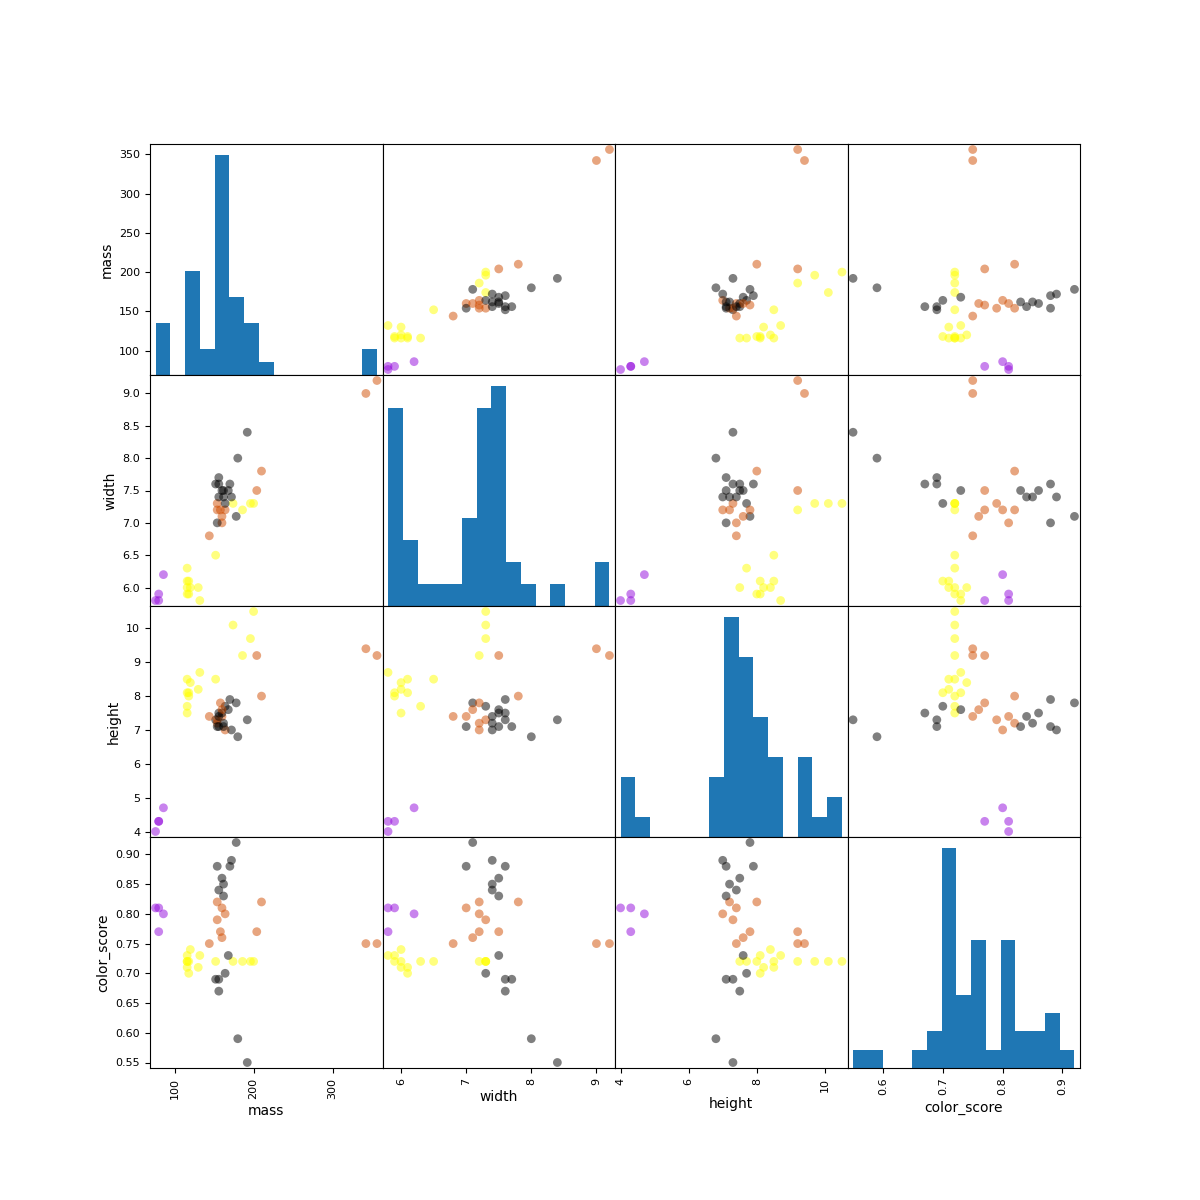

In [9]:
# so before to analyse training data we first visualize them
from matplotlib import cm

cmap = cm.get_cmap('gnuplot')
# here we plot everyone of the feature columns in a scatter plot, and in the
# diagonal it will appear histograms
scatter = pd.plotting.scatter_matrix(X_train, c= Y_train, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(12,12), cmap=cmap)

<IPython.core.display.Javascript object>


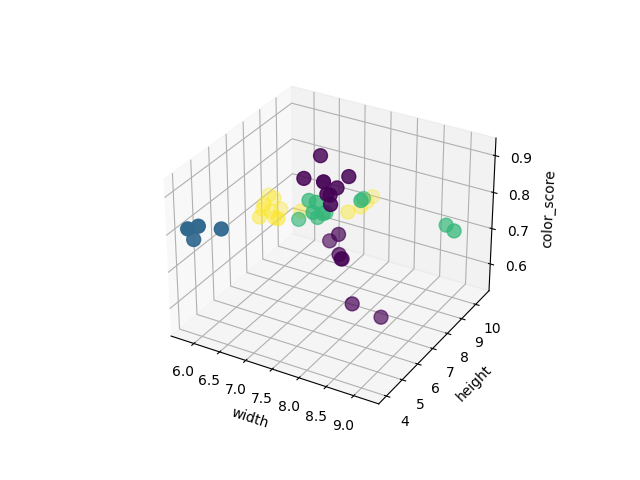

In [10]:
# Moreover, we can visualaze this plotting in 3D
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train['width'], X_train['height'], X_train['color_score'], c=Y_train, marker='o', s=100)
ax.set_xlabel('width')
ax.set_ylabel('height')
ax.set_zlabel('color_score')
plt.show()

## K-Nearest Neightbors Classification

In [11]:
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


### Create classifier object

In [12]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

In [13]:
# and we train the classifier (fit the estimator) using the training data
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [14]:
# so to know the accuracy of the classifier on future data
# using the test data
knn.score(X_test, Y_test)

0.5333333333333333

In [15]:
# and then we can make predictions by using the k-NN classifier model
fruit_prediction = knn.predict([[20, 4.3, 5.5, 0.9]])
lookup_fruit_name[fruit_prediction[0]]

/home/segismundo/.local/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


'mandarin'

In [16]:
# using extreme values
fruit_prediction = knn.predict([[100, 6.3, 8.5, 0.4]])
lookup_fruit_name[fruit_prediction[0]]

/home/segismundo/.local/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


'lemon'

<IPython.core.display.Javascript object>


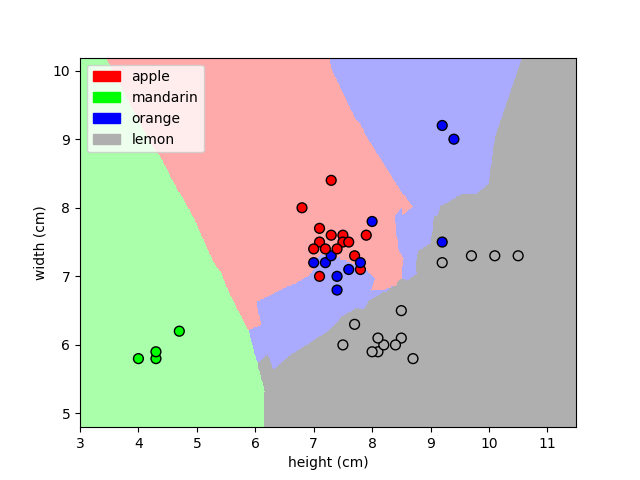

In [18]:
# finally we can plot the Voronoi diagrams or plot the decision
# boundaries of the k-NN classifier
from adspy_shared_utilities import plot_fruit_knn

# the parameter 'uniform' depicts the weighting method
plot_fruit_knn(X_train, Y_train, 5, 'uniform')

<IPython.core.display.Javascript object>


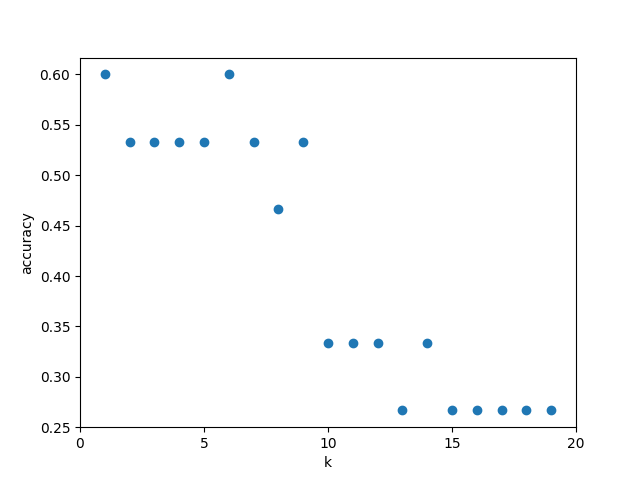

In [20]:
# now we can know how sensitive is k-NN classifier accuracy to the choice of 'k' parameter
k_range = range(1,20)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, Y_train)
    scores.append(knn.score(X_test, Y_test))

plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20]);